In [ ]:
import os
import math
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight, shuffle
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from keras.models import load_model
#https://github.com/qubvel/efficientnet
import efficientnet.keras as efn
warnings.filterwarnings("ignore")

C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [ ]:
from image_preprocessing import Preprocessing_images
from classification_output import classification_output
from output_distribution import plot_distribution
from plot_confusion_matrix import plot_confusion_matrix

In [3]:
#fixing rnadom seed
np.random.seed(2019)
tf.set_random_seed(2019)
seed = 2019
IMG_SIZE=224

In [4]:
df_train = pd.read_csv('D:/Blindness Detection//train.csv')
df_test = pd.read_csv('D:/Blindness Detection//test.csv')

df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
id_code = df_train['id_code']
diagnosis = df_train['diagnosis']

id_code, diagnosis = shuffle(id_code, diagnosis, random_state=seed)

x_train, x_valid, y_train, y_valid = train_test_split(id_code, diagnosis, test_size=0.15, stratify=diagnosis, random_state=seed)

x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

x_test = df_test['id_code']

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(3112,)
(3112,)
(550,)
(550,)
(1928,)


In [6]:
def final_model(df=x_train,name='x_train',sub_dir='train_images'):
    if os.path.exists('D:/Blindness Detection/'+name+'_224_2019.npy'):
        x = np.load('D:/Blindness Detection/'+name+'_224_2019.npy', mmap_mode=None, allow_pickle=False, fix_imports=True)
    else:
        x = Preprocessing_images(df=df, sub_dir=sub_dir, ben=True, sigmaX=50, img_size=IMG_SIZE)
        np.save(file='D:/Blindness Detection/'+name+'_224_2019.npy', arr=x_train)
        
    print("The shape of input is:",x.shape)
    
    best_model = load_model('C:/Users/HP/Self_case_study-2/model_ten_kappa.h5')
    predicted_out = best_model.predict(x,batch_size=8) > 0.5
    final_out = classification_output(predicted_out)
    
    df_output = pd.DataFrame(df,columns=['id_code'])
    df_output['diagnosis'] = final_out
    
    print("The distributiuon of predicted output variable is:")
    
    plot_distribution(labels=df_output['diagnosis'], t_cv_te=name)
    
    return df_output
        
    

The shape of input is: (3112, 224, 224, 3)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The distributiuon of predicted output variable is:
--------------------------------------------------------------------------------


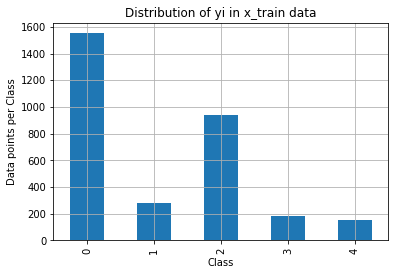

Number of data points in class 1 : 1551 ( 49.839 %)
Number of data points in class 3 : 943 ( 30.302 %)
Number of data points in class 2 : 281 ( 9.03 %)
Number of data points in class 4 : 183 ( 5.88 %)
Number of data points in class 5 : 154 ( 4.949 %)
The shape of input is: (550, 224, 224, 3)
The distributiuon of predicted output variable is:
--------------------------------------------------------------------------------


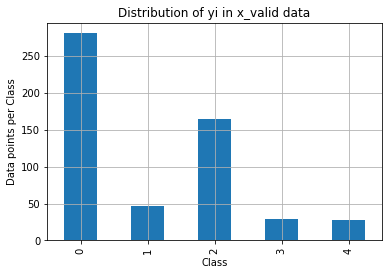

Number of data points in class 1 : 281 ( 51.091 %)
Number of data points in class 3 : 165 ( 30.0 %)
Number of data points in class 2 : 47 ( 8.545 %)
Number of data points in class 4 : 29 ( 5.273 %)
Number of data points in class 5 : 28 ( 5.091 %)
The shape of input is: (1928, 224, 224, 3)
The distributiuon of predicted output variable is:
--------------------------------------------------------------------------------


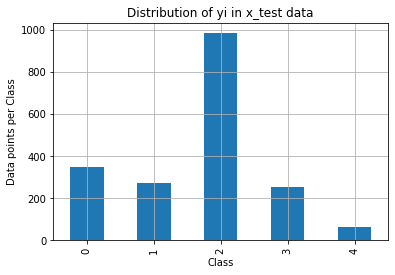

Number of data points in class 3 : 985 ( 51.089 %)
Number of data points in class 1 : 351 ( 18.205 %)
Number of data points in class 2 : 274 ( 14.212 %)
Number of data points in class 4 : 252 ( 13.071 %)
Number of data points in class 5 : 66 ( 3.423 %)
The kappa scores of train and validation sets are:
0.9305866362656886 0.9201368068512069


In [7]:
train_output = final_model(df=x_train,name='x_train', sub_dir='train_images')
validation_output = final_model(df=x_valid,name='x_valid', sub_dir='train_images')
test_output = final_model(df=x_test,name='x_test', sub_dir='test_images')

train_metric = cohen_kappa_score(y_train, train_output['diagnosis'], weights='quadratic')
validation_metric = cohen_kappa_score(y_valid, validation_output['diagnosis'], weights='quadratic')
print("The kappa scores of train and validation sets are:")
print(train_metric, validation_metric)

Train Set Results
Number of misclassified points  14.331619537275063
-------------------------------------------------- Confusion matrix --------------------------------------------------


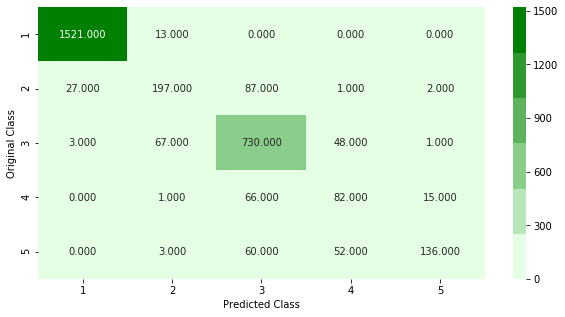

-------------------------------------------------- Precision matrix --------------------------------------------------


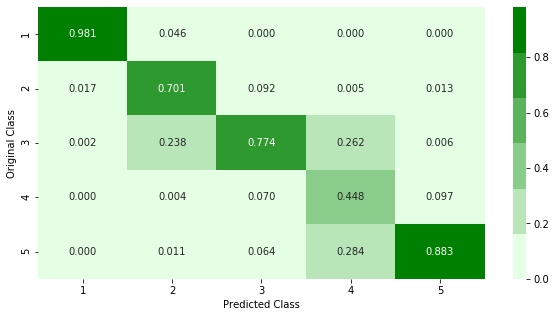

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


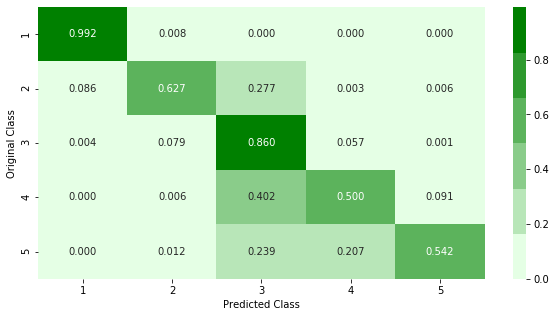

Sum of rows in recall matrix [1. 1. 1. 1. 1.]


In [8]:
np.save(file='D:/Blindness Detection/y_pred_train_224_2019.npy', arr=train_output['diagnosis'])
print("Train Set Results")
plot_confusion_matrix(y_train, train_output['diagnosis'])

Validation Set Results
Number of misclassified points  15.272727272727273
-------------------------------------------------- Confusion matrix --------------------------------------------------


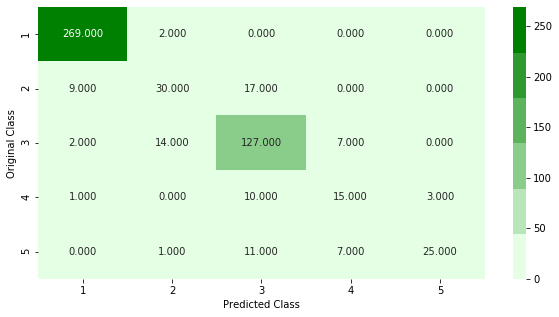

-------------------------------------------------- Precision matrix --------------------------------------------------


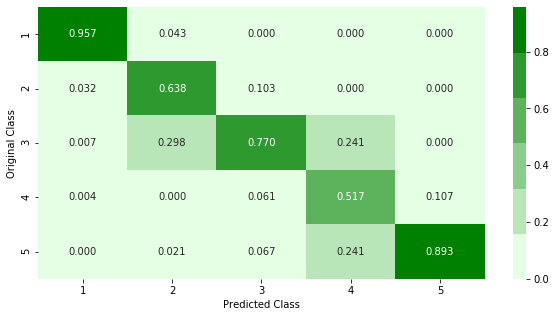

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


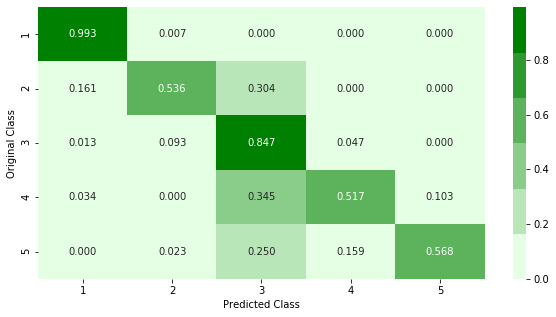

Sum of rows in recall matrix [1. 1. 1. 1. 1.]


In [9]:
np.save(file='D:/Blindness Detection/y_pred_valid_224_2019.npy', arr=validation_output['diagnosis'])
print("Validation Set Results")
plot_confusion_matrix(y_valid, validation_output['diagnosis'])

In [10]:
np.save(file='D:/Blindness Detection/y_pred_test_224_2019.npy', arr=test_output['diagnosis'])